In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier

# Boosting
Skeleton
- Learning Curve
- Hyperparameter Tuning + Validation Curve + Wall Clock

# Iris

## Get train and test

In [3]:
from functions import preprocess_iris, SEED, generate_learning_curve, generate_validation_curve

In [4]:
from sklearn.metrics import roc_auc_score

In [5]:
X_train, X_test, y_train, y_test = preprocess_iris()

## Baseline Learning Curve

In [6]:
estimator = GradientBoostingClassifier(random_state=SEED)

train wall clock: 0.12761807441711426
test wall clock: 0.0026663780212402345
train roc auc:  1.0
test roc auc: 0.9833333333333334


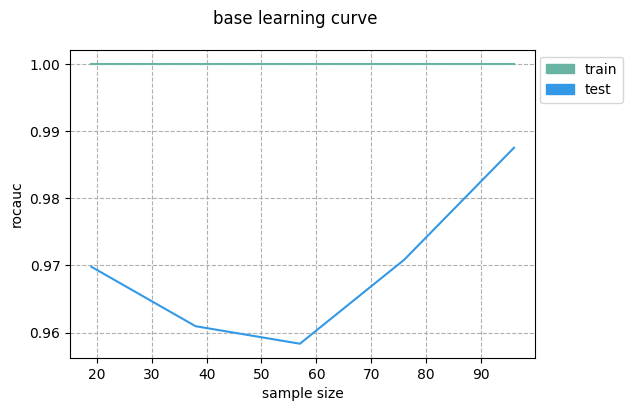

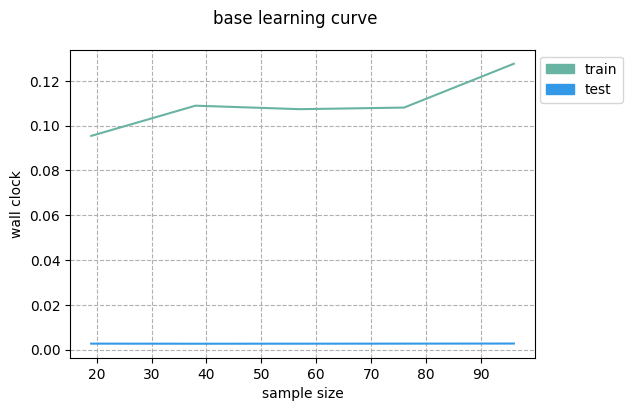

In [7]:
generate_learning_curve(estimator, X_train, y_train, X_test, y_test, "sample size", "base learning curve", "roc_auc_ovo")

## Validation Curve

### Pruning (PRE)

#### Max Depth

In [8]:
params = [1,2,3,4,5]
estimators = []
for param in params:
    estimator = GradientBoostingClassifier(random_state=SEED, max_depth=param)
    estimators.append(estimator)

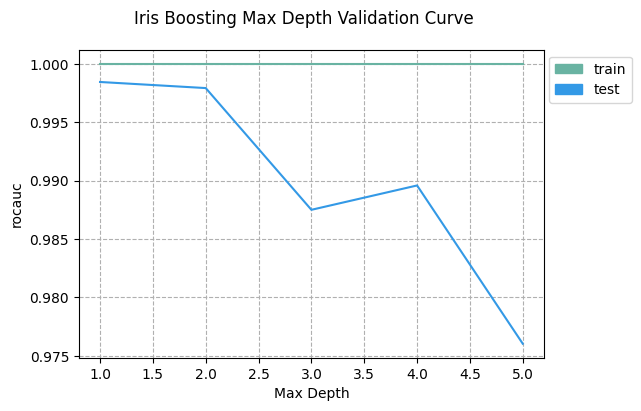

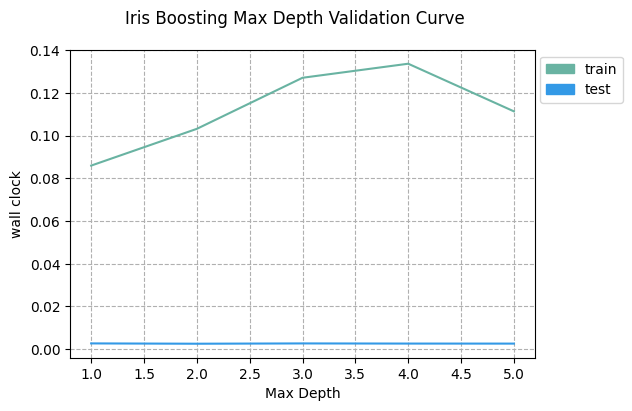

In [9]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "Max Depth", "Iris Boosting Max Depth Validation Curve",'line','roc_auc_ovo')

#### Max Nodes

In [10]:
params = [2,3,4,5,6,7,8,9,10]
estimators = []
for param in params:
    estimator = GradientBoostingClassifier(random_state=SEED,max_leaf_nodes=param, max_depth=1)
    estimators.append(estimator)

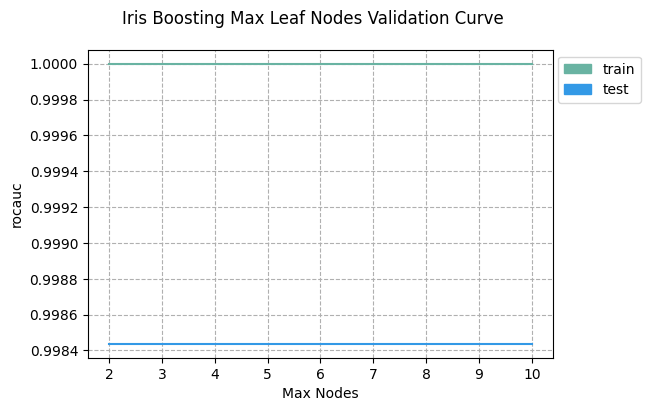

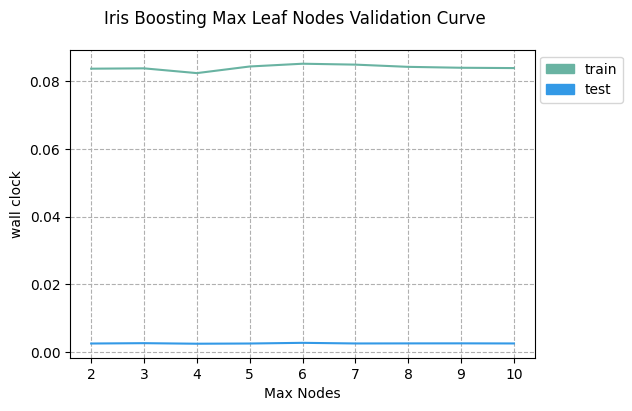

In [11]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "Max Nodes", "Iris Boosting Max Leaf Nodes Validation Curve",'line','roc_auc_ovo')

### # of Weak Learners

In [12]:
params = [10, 20, 30, 40, 50, 60,70]
estimators = []
for param in params:
    estimator = GradientBoostingClassifier(random_state=SEED,max_leaf_nodes=2, max_depth=1, n_estimators=param)
    estimators.append(estimator)

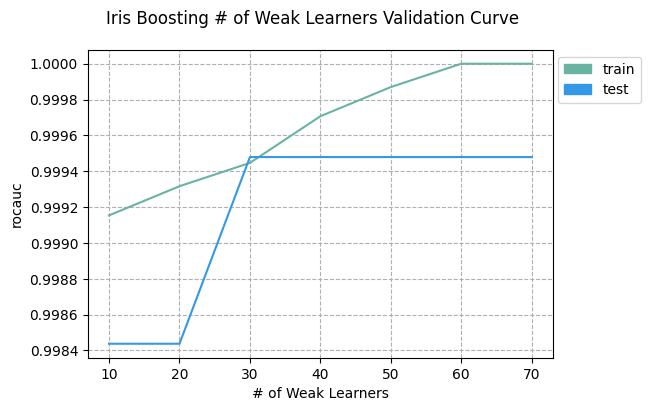

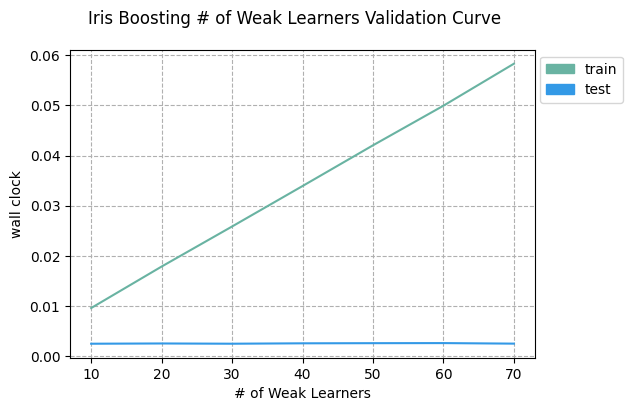

In [13]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "# of Weak Learners", "Iris Boosting # of Weak Learners Validation Curve",'line',"roc_auc_ovo")

### Learning Rate

In [14]:
params = [0.01, 0.05, 0.1, 0.15, 0.2]
estimators = []
for param in params:
    estimator = GradientBoostingClassifier(random_state=SEED,max_leaf_nodes=2, max_depth=1, n_estimators=60, learning_rate=param)
    estimators.append(estimator)

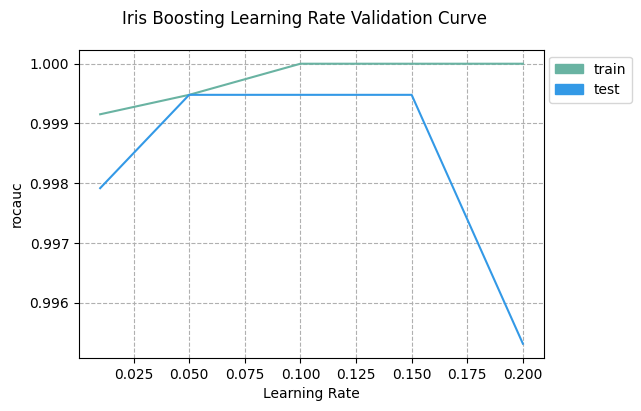

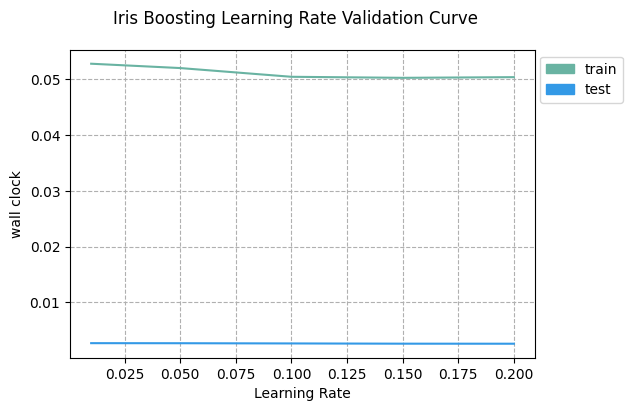

In [15]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "Learning Rate", "Iris Boosting Learning Rate Validation Curve",'line',"roc_auc_ovo")

In [16]:
from functions import trigger_validate

train wall clock: 0.051028776168823245
test wall clock: 0.0025574207305908204
train roc auc:  1.0
test roc auc: 0.9766666666666666


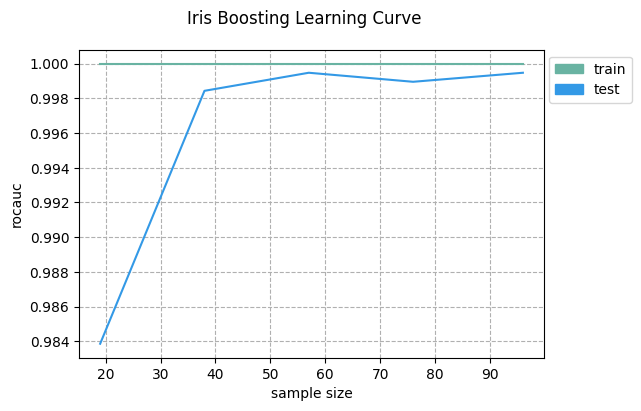

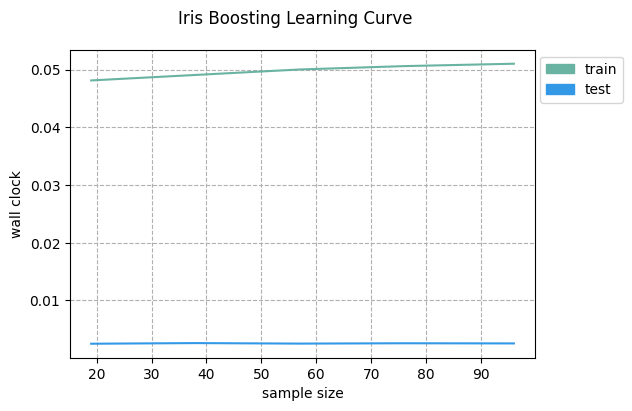

In [17]:
estimator = GradientBoostingClassifier(random_state=SEED, n_estimators=60, learning_rate=0.15, max_depth=1,max_leaf_nodes=2)
generate_learning_curve(estimator, X_train, y_train, X_test, y_test, "sample size", "Iris Boosting Learning Curve", "roc_auc_ovo")